# Dfs0 - Relative time axis

MIKE IO uses a pandas DatetimeIndex to represent the time dimension in
dfs files. If the Dfs file has a relative time axis it will be converted
to DatetimeIndex by using 1970-1-1 00:00:00 as start time.

In [1]:
import mikeio

In [2]:
ds = mikeio.read("../../data/eq_relative.dfs0")
ds

<mikeio.Dataset>
dims: (time:504)
time: 0 days 00:00:00 - 0 days 00:00:56.236909 (504 non-equidistant records)
geometry: GeometryUndefined()
items:
  0:  Item 1 <Undefined> (undefined)
  1:  Item 2 <Undefined> (undefined)
  2:  Item 3 <Undefined> (undefined)
  3:  Item 4 <Undefined> (undefined)
  4:  Item 5 <Undefined> (undefined)

In [3]:
df = ds.to_dataframe()
df.head()

Correcting the dataframe index by subtracting start time to get relative
time axis.

In [4]:
df.index = (df.index - df.index[0]).total_seconds()
df.index.name = "Relative time (s)"

In [5]:
df.head()

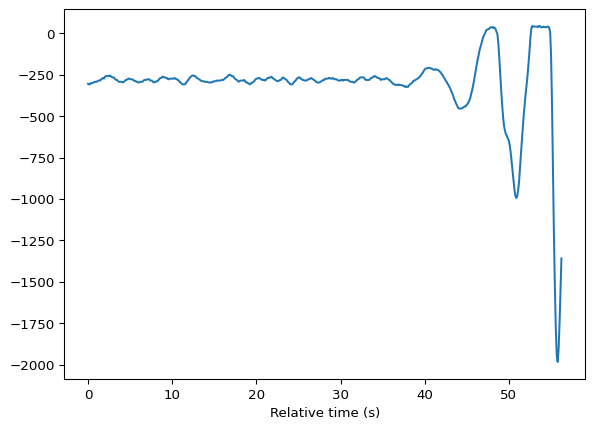

In [6]:
df['Item 5'].plot();

## mikecore

An alternative is to use the underlying library
[`mikecore`](https://github.com/DHI/mikecore-python) to read the file.

In [7]:
from mikecore.DfsFileFactory import DfsFileFactory

dfs = DfsFileFactory.DfsGenericOpen("../../data/eq_relative.dfs0")

Using the `ReadDfs0DataDouble` method you get the data as a numpy array,
with the time axis or other type of as the first column,

In [8]:
data = dfs.ReadDfs0DataDouble()

type(data)

numpy.ndarray

which can be converted to a pandas dataframe. First we extract the name
of items (which in this example hapeens to be not very creative).

In [9]:
index_name = "time"
items = [i.Name for i in dfs.ItemInfo]
items = [index_name] + items
items

['time', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5']

In [10]:
import pandas as df

df = df.DataFrame(data, columns=items).set_index(index_name)
df.head()